In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# **Importing** the necessary modules and libraries.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras import layers
import tensorflow.keras as keras

## Here we are applying the preprocessing techniques to our Image dataset to enhance the quality of data and make better models.

Datagen is the Image Data Generator for our validation and testing data. Here we rescale our images to the range [0,1]. Here 80% of data will be used to validate our model's accuracy to avoid the issue of overfitting. 20% of data will be used for testing our model after training.

In [2]:
datagen = keras.preprocessing.image.ImageDataGenerator(rescale = 1.0/255,
                                                      validation_split = 0.2,
                                                      )

Datagen1 is the Image Data Generator for our training data. Here we rescale our images to the range [0,1].We are also applying zoom and brightness image augmentation to enchance our training data and achieve higher model accuracy. Here 100% of data will be used to train our model.

In [22]:
datagen_1 = keras.preprocessing.image.ImageDataGenerator(rescale = 1.0/255,
                                                       
                                                       
                                                      )

#### Loading the training data

In [28]:
training_data = datagen_1.flow_from_directory('/kaggle/input/brain-tumor-classification-mri/Training',
                                            class_mode='categorical',
                                            batch_size=64
                                            )

Found 2870 images belonging to 4 classes.


#### Loading the validation data

In [29]:
validation_data = datagen.flow_from_directory('/kaggle/input/brain-tumor-classification-mri/Testing',
                                              class_mode = 'categorical',
                                              batch_size=64,
                                              
                                            )

Found 394 images belonging to 4 classes.


#### Loading the testing data

In [6]:
testing_data = datagen.flow_from_directory('/kaggle/input/brain-tumor-classification-mri/Testing',
                                              class_mode = 'categorical',
                                              batch_size=128,
                                              subset = 'validation'
                                            )

Found 78 images belonging to 4 classes.


### Here are visualizing our images to draw insights about our dataset. Here we can see our images are grayscale which helps in increasing model accuracy. Increasing the brightness of our dataset can help ourt model in indentifying more clear and precise patterns from images

/opt/conda/lib/python3.7/site-packages/matplotlib/text.py:1223: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


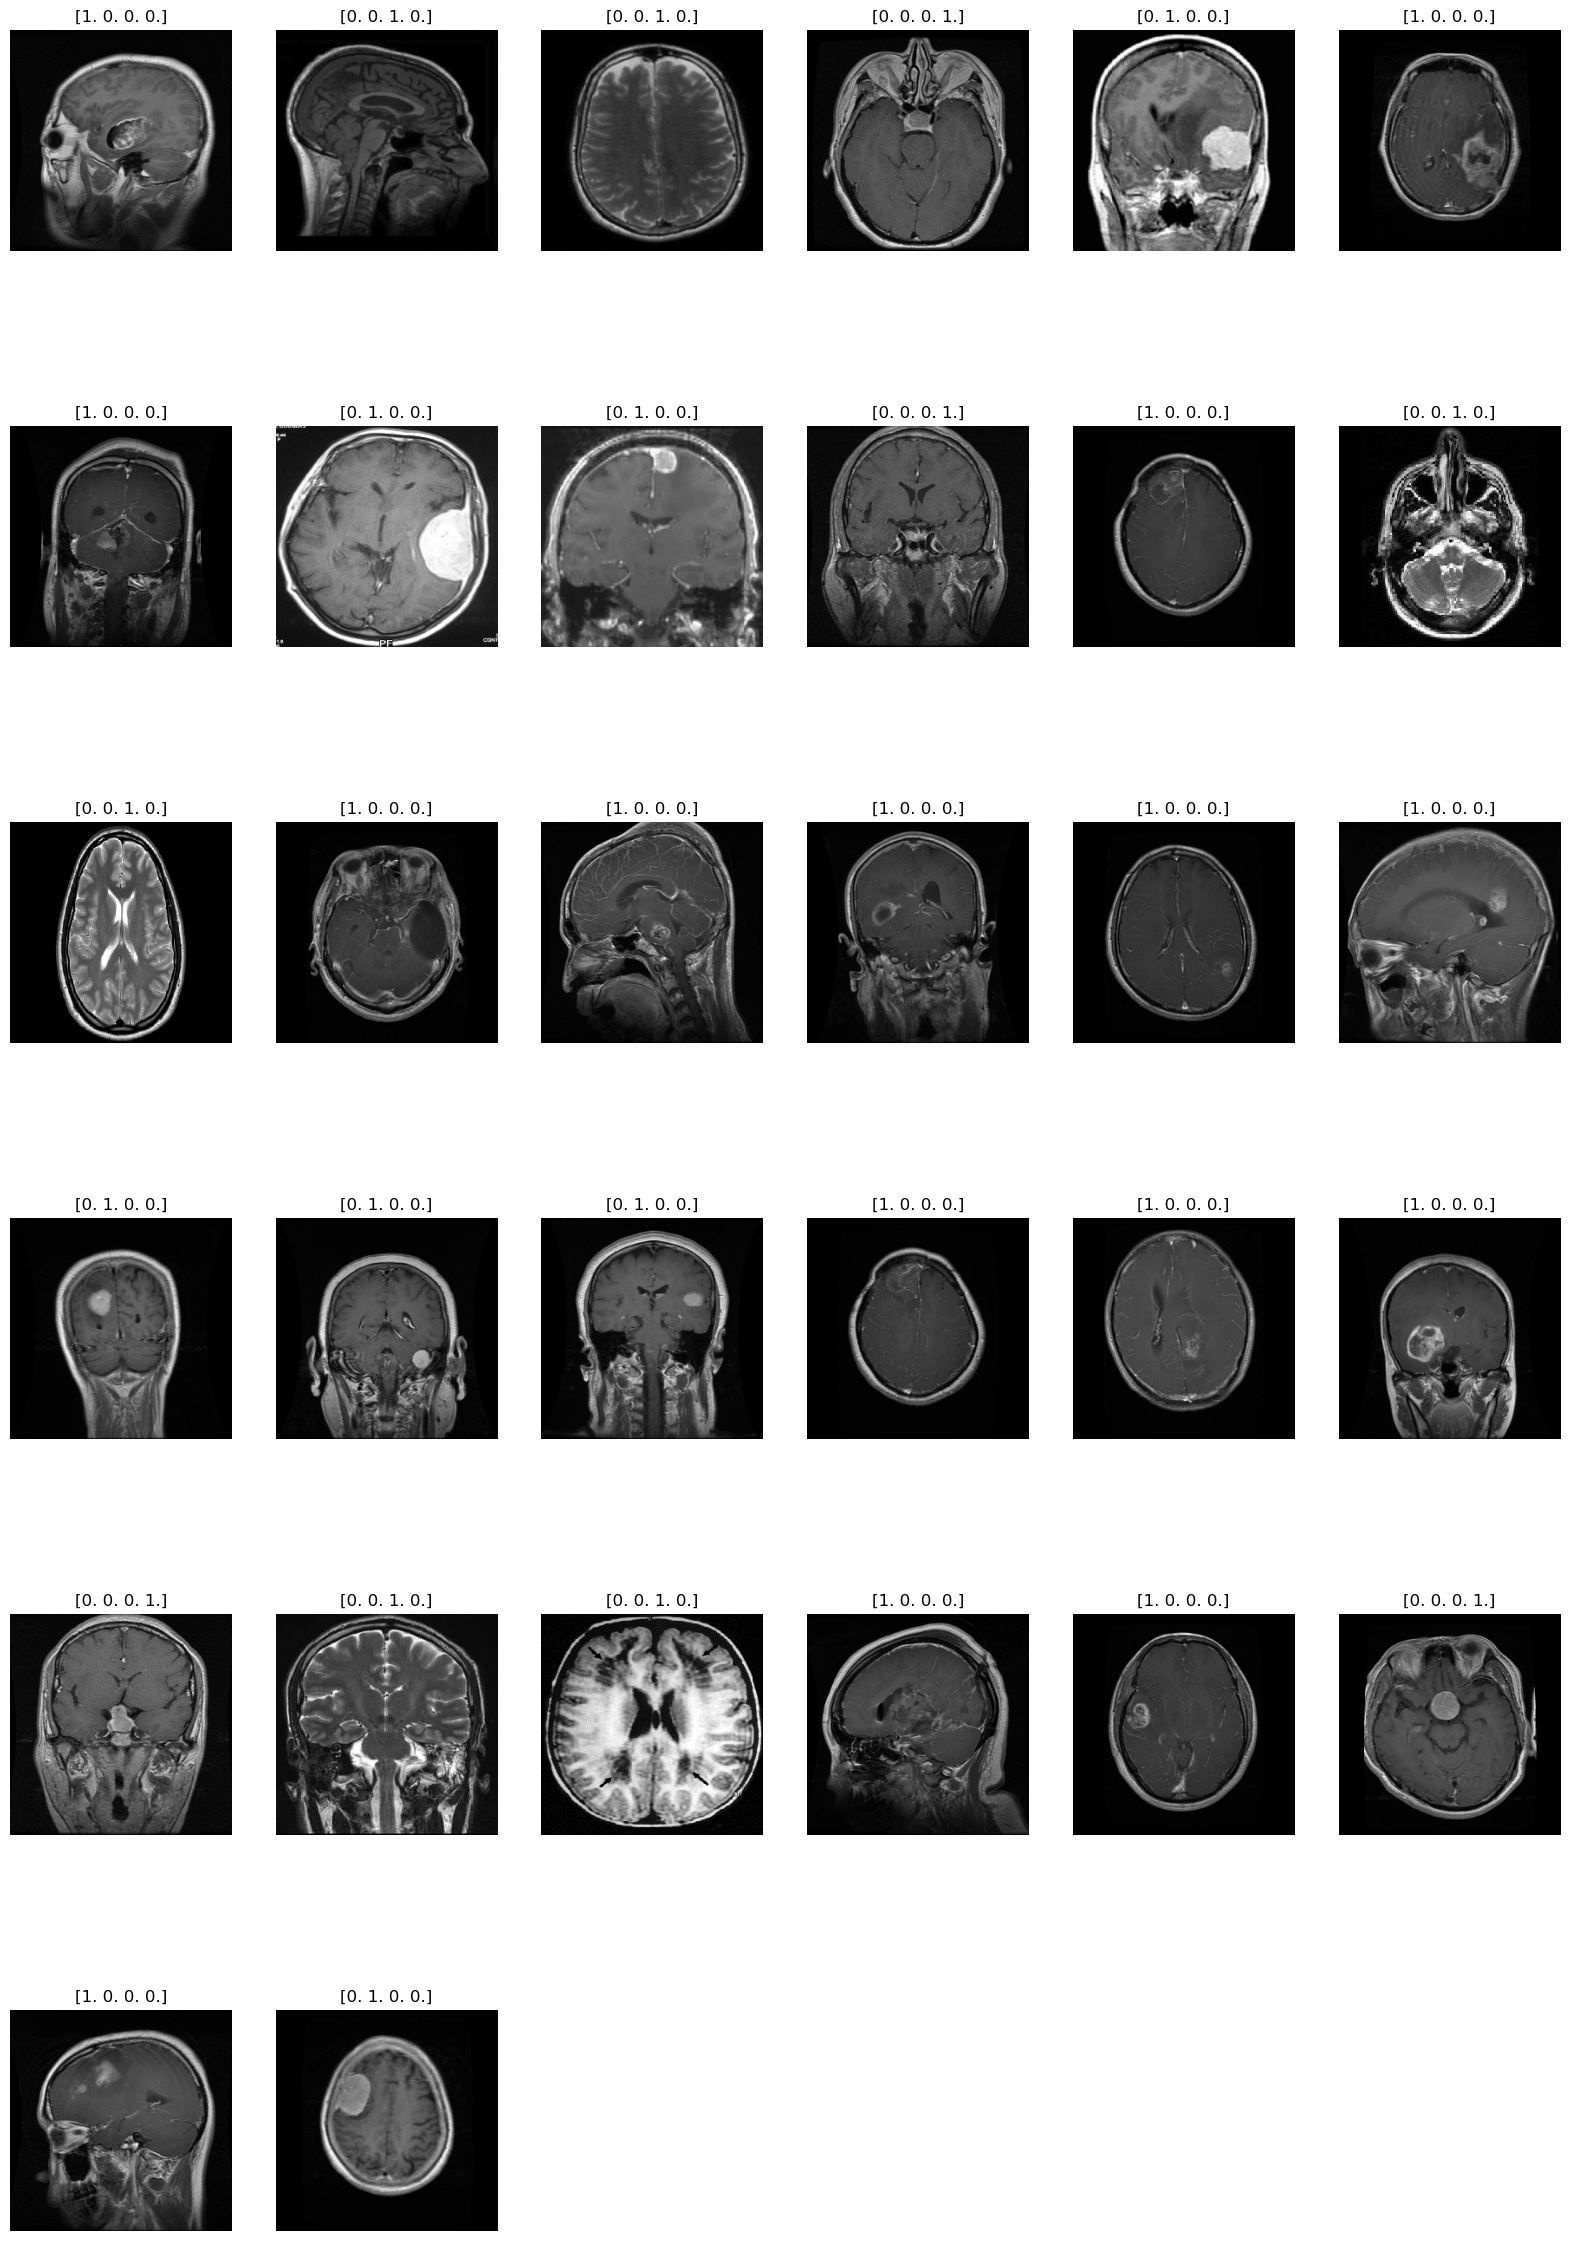

In [25]:
plt.figure(figsize=(20, 30))
for images, labels in training_data:
  for i in range(32):
    ax = plt.subplot(6, 6, i + 1)
    plt.imshow(np.array(images[i], dtype = 'float'))
    plt.title(labels[i])
    plt.axis("off")
  break

 # Importing the different types of layers for building our Covolutional Neural Network(CNN)
1. #### Conv2D layers are used to build convolutional layers.
2. #### MaxPooling2D layers are used to reduce the size of feature map without losing the important features.
3. #### Dropout layers areed to generalize the CNN model and overcome the issue of overfitting.
4. #### Flatten layer is used to reshape the 2D or 3D feature map to a 1 dimensional array.
5. #### Dense layers are used to build ANN to predict the outcome after extracting features from the images.

In [8]:
from keras.layers import Conv2D,MaxPooling2D,Dropout,Flatten,Dense

#### Here we are creating a CNN model using Transfer Learning. We are using NASNetLarge pretrained model as base model to create our model with high accuracy.

In [9]:
base_model = keras.applications.NASNetLarge(input_shape = (256,256,3),
                                            include_top=False,
                                            weights = 'imagenet')

343610240/343610240 [==============================] - 3s 0us/step


#### Fixing the parameters of the base model since it has already been trained on a set of nearly 10 million images belong to 1000 different classes.

In [10]:
base_model.trainable = False

#### Creating the model with base model, 3 dense layers, 1 dropout layers and a flatten layers. These numbers have been adjusted after experimenting with many different combination of layers.

#### We have compiled our model with Categorical Cross entropy loss since it is very suitable when we have multiclass classification with categorical labels. The RMSprop optimizer and it's learning rate was chosen after trying out with different optimizers.

In [37]:
model = keras.Sequential([
    base_model,
    Flatten(),
    Dense(512,activation ='relu'),
    Dense(4,activation = 'softmax')
])
model.compile(loss = 'categorical_crossentropy',
              optimizer = keras.optimizers.RMSprop(learning_rate = 0.000001),
              metrics = ['accuracy']
             )

### Summarizing the model 

In [38]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 NASNet (Functional)         (None, 8, 8, 4032)        84916818  
                                                                 
 flatten_8 (Flatten)         (None, 258048)            0         
                                                                 
 dense_20 (Dense)            (None, 512)               132121088 
                                                                 
 dense_21 (Dense)            (None, 4)                 2052      
                                                                 
Total params: 217,039,958
Trainable params: 132,123,140
Non-trainable params: 84,916,818
_________________________________________________________________


#### Here we have created another model without using Transfer Learning. It uses a combination of many Conv2D, MaxPooling2D, Flatten, Dropout and dense layers. We will compare the accuracy and working of this model with the one created above using NASNetLarge as base modl.

In [ ]:
model_without_base_model = keras.Sequential([
                                            Conv2D(32,(3,3),padding='same',activation = 'relu',input_shape=(256,256,3)),
                                            Conv2D(32,(3,3),padding='same',activation = 'relu',input_shape=(256,256,3)),
                                            MaxPooling2D((2,2)),
    
                                            Conv2D(64,(3,3),padding='same',activation = 'relu'),
                                            Conv2D(64,(3,3),padding='same',activation = 'relu'),
                                            MaxPooling2D((2,2)),
    
                                            Conv2D(64,(3,3),padding='same',activation = 'relu'),
                                            MaxPooling2D((2,2)),
    
                                            Conv2D(128,(3,3),padding='same',activation = 'relu'),
                                            MaxPooling2D((2,2)),
    
                                            Conv2D(128,(3,3),activation = 'relu'),
                                            MaxPooling2D((2,2)),
    
                                            Conv2D(256,(3,3)),
    
                                            Flatten(),
                                            Dense(512,activation = 'relu'),
                                            Dropout(0.4),
    
                                            Dense(64,activation='relu'),
                                            Dropout(0.4),
    
                                            Dense(4,activation = 'softmax')
                                            ])

model_without_base_model.compile(loss = 'categorical_crossentropy',
              optimizer = keras.optimizers.RMSprop(learning_rate = 0.00001),
              metrics = ['accuracy']
             )
model_without_base_model.summary()

## Training the model with training data and validating the model's accuracy with the validation data.

In [39]:
history = model.fit(training_data,
          epochs = 50,
          validation_data = validation_data,
          steps_per_epoch=len(training_data),
          validation_steps=len(validation_data))

Epoch 1/50
45/45 [==============================] - 126s 1s/step - loss: 0.9082 - accuracy: 0.6390 - val_loss: 1.1490 - val_accuracy: 0.5152
Epoch 2/50
45/45 [==============================] - 51s 1s/step - loss: 0.5000 - accuracy: 0.8279 - val_loss: 1.0595 - val_accuracy: 0.6218
Epoch 3/50
45/45 [==============================] - 50s 1s/step - loss: 0.3645 - accuracy: 0.8760 - val_loss: 1.0099 - val_accuracy: 0.6929
Epoch 4/50
45/45 [==============================] - 51s 1s/step - loss: 0.2770 - accuracy: 0.9167 - val_loss: 0.9272 - val_accuracy: 0.7360
Epoch 5/50
45/45 [==============================] - 50s 1s/step - loss: 0.2197 - accuracy: 0.9383 - val_loss: 1.0226 - val_accuracy: 0.7487
Epoch 6/50
45/45 [==============================] - 51s 1s/step - loss: 0.1758 - accuracy: 0.9568 - val_loss: 0.9387 - val_accuracy: 0.7665
Epoch 7/50
45/45 [==============================] - 51s 1s/step - loss: 0.1412 - accuracy: 0.9714 - val_loss: 0.9717 - val_accuracy: 0.7716
Epoch 8/50
45/45 [=

KeyboardInterrupt: 

## Training the model with training data and validating the model's accuracy with the validation data. 

In [ ]:
history_1 = model_without_base_model.fit(training_data,
                                       epochs = 40,
                                       validation_data = validation_data,
                                       steps_per_epoch=len(training_data),
                                       validation_steps=len(validation_data))

## Plotting the model metrics graphs for both the models and comparing the two.

In [ ]:
loss_train = history.history['loss']
loss_val = history.history['val_loss']
epochs = range(1,51)
fig,ax = plt.subplots(1,2,figsize=(10,5))
ax[1].plot(epochs, loss_train, 'g', label='Training loss')
ax[1].plot(epochs, loss_val, 'b', label='validation loss')
ax[1].set_title('Training and Validation loss')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Loss')
ax[1].legend()

loss_train = history.history['accuracy']
loss_val = history.history['val_accuracy']
ax[0].plot(epochs, loss_train, 'g', label='Training accuracy')
ax[0].plot(epochs, loss_val, 'b', label='validation accuracy')
ax[0].set_title('Training and Validation accuracy')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Accuracy')
ax[0].legend()
plt.show()

### The model created using tranfer learning is achieving a training accuracy of 90% and a validation accuracy of nearly 75%-80%.

In [ ]:
loss_train = history_1.history['loss']
loss_val = history_1.history['val_loss']
epochs = range(1,51)
fig,ax = plt.subplots(1,2,figsize=(10,5))
ax[1].plot(epochs, loss_train, 'g', label='Training loss')
ax[1].plot(epochs, loss_val, 'b', label='validation loss')
ax[1].set_title('Training and Validation loss')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Loss')
ax[1].legend()

loss_train = history_1.history['accuracy']
loss_val = history_1.history['val_accuracy']
ax[0].plot(epochs, loss_train, 'g', label='Training accuracy')
ax[0].plot(epochs, loss_val, 'b', label='validation accuracy')
ax[0].set_title('Training and Validation accuracy')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Accuracy')
ax[0].legend()
plt.show()

### The model created without using the NASNetLarge base model achieved a training accuracy of 50-60% and a validation accuracy of 60%.

### As we can see the first model performs significantly better than the second model. SO, we use the first model to predict and test our model.

In [ ]:
plt.figure(figsize=(20, 30))
for images, labels in testing_data:
  for i in range(32):
    ax = plt.subplot(6, 6, i + 1)
    plt.imshow(np.array(images[i], dtype = 'float'))
    plt.title(labels[i])
    predicted_class = model.predict(images[i])
    plt.xlabel(predicted_class)
    plt.axis("off")
  break